<a href="https://colab.research.google.com/github/s28633/Homework-PAD/blob/main/Zadanie_ZUM_4__s28633_AnnaBorys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Data Science z Python 3.10. Klasyfikacja zdjęć z fast.ai v1 & Jupyter Notebook
## 🇬🇧 Data Science with Python 3.10. Classification of images using fast.ai V1 & Jupyter Notebook
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [ ]:
import fastbook
from fastbook import*
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Mozemy pracować na najnowszej wersji fastai (2.7.13) albo na starszej (np. 1.0.61). Starsza wersja fastai generuje obecnie mniejszą liczbę problemów w Google Colab.

In [ ]:
path = Path("C:\\Users\\barte\\Desktop\\Ania_ZUM_1\\dataset_x1")

### 2. Przygotowanie danych do analizy

In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128)
)
# Określenie klas danych

In [ ]:
data = data.new(
    item_tfms = RandomResizedCrop(128, min_scale = 0.5),
    batch_tfms = aug_transforms(max_rotate=8.0, max_zoom=15.5, pad_mode='zeros', p_affine=0.95))

dls= data.dataloaders(path, bs=20, num_workers= 0)

# weryfikacja danych
verify_images(path.ls())

(#3) [Path('C:/Users/barte/Desktop/Ania_ZUM_1/dataset_x1/.DS_Store'),Path('C:/Users/barte/Desktop/Ania_ZUM_1/dataset_x1/cat'),Path('C:/Users/barte/Desktop/Ania_ZUM_1/dataset_x1/dog')]

In [ ]:

# losowe przdzielenie zdjęć z określonych katalogów do klas, wybór propocji danych treningowych i testowych
# tfms odpowiada za modyfikowanie danych, korzystamy z https://docs.fast.ai/vision.data.html
# https://fastai1.fast.ai/vision.transform.html
# wartości domyślne dla get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None) → Collection[Transform]

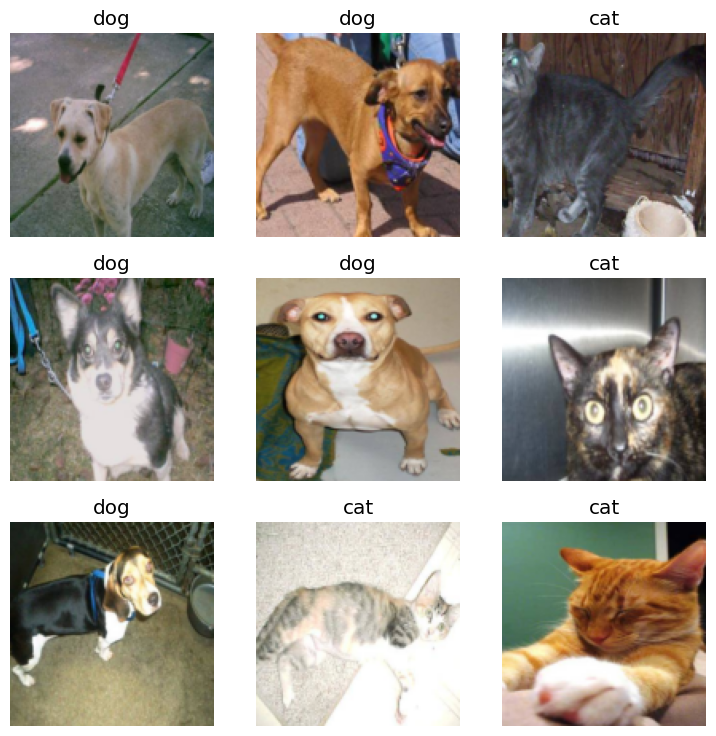

In [ ]:
dls.valid.show_batch()
# pokazuje 9 losowo wybranych zdjęć z przypisaną do nich kategorią

In [ ]:

# pokazuje informcję o liczbie klas oraz o liczbie materiałów przeznaczonych do treningu oraz do testu

### 3. Trenowanie modelu

In [ ]:
learn= vision_learner(dls, alexnet, metrics= accuracy)
# resnet18, resnet34, resnet50, resnet101, resnet152, squeezenet1_0, squeezenet1_1, densenet121, densenet169,
# densenet201, densenet161, vgg16_bn, vgg19_bn, alexnet


# batch size

# 2 epoki przy one cycle policy

In [ ]:
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [ ]:
learn.fit(5)


epoch,train_loss,valid_loss,accuracy,time
0,1.276054,0.766476,0.693548,00:01
1,1.174608,0.638776,0.774194,00:01
2,1.063771,0.546957,0.838710,00:01
3,1.054919,0.450448,0.854839,00:01
4,1.060261,0.543740,0.903226,00:01


In [ ]:
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.825058,0.361259,0.887097,00:01
1,0.914941,0.324304,0.887097,00:01
2,0.905196,0.357446,0.870968,00:01
3,0.914910,0.399509,0.854839,00:01
4,0.886430,0.442166,0.854839,00:01


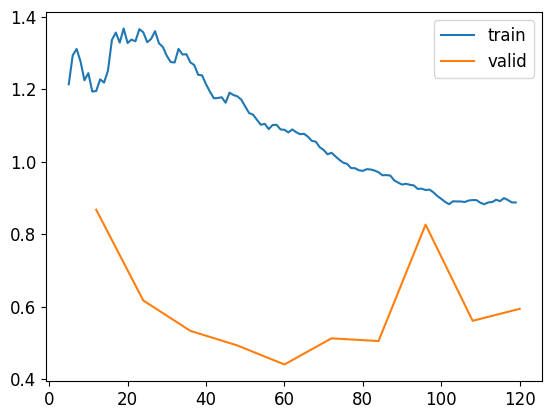

In [ ]:

# generuje wykres, ktory przedstawia epoki z train/validation loss
learn.recorder.plot_loss()

In [ ]:

# przegląd modelu

In [ ]:

# przegląd warstw modelu

### 4. Eksport modelu

In [ ]:

# eksport
learn.export(fname='model.pkl')

### 5. Confusion matrix

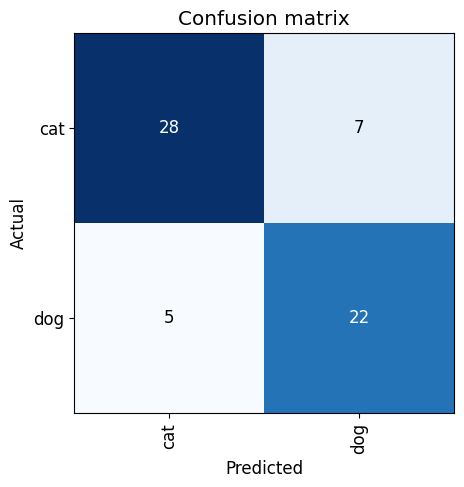

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()
# tworzenie confusion matrix

In [ ]:

# tworzenie confusion matrix

In [ ]:

# najczęstsze błędy

### 6. Wykorzystanie modelu w praktyce
#### 🇬🇧 Predictions

In [ ]:

# przygotowanie do predykcji

In [ ]:


# określenie materiału, którego kategorie chcemy przewidzieć, załadowanie go, dokonanie klasyfikacji

## 📚 Zadanie
#### Przeprowadź dwa nowe eksperymenty:
##### a. wytrenuj nowy model wprowadzając wybrane przez Ciebie modyfikacje do augmentacji danych, zwiększ liczbę epok do 5, porównaj wyniki z modelem oryginalnym;
##### b. wytrenuj nowy model wprowadzając zmiany w zakresie: zmiany rozdzielczości danych do 300 px., zmiany techniki wypełniania „brakujących pikseli” (tj. padding) na „zeros”; zmniejszeniu wartości batch size o 5; zmniejszeniu ilości danych walidacyjnych do 15%, zmiany liczby epok do 5, porównaj wyniki z modelem oryginalnym.
#### Opisz trzy wytrenowane przez siebie modele, udziel odpowiedzi na poniższe pytania:
##### a. Czy modele cechują się, Twoim zdaniem, dostateczną dokładnością klasyfikacji?
##### b. Czy jeden z modeli jest bardziej podatny na popełnienie błędu I/II rodzaju?
##### c. Jak przebiegał proces uczenia się modeli? (po której epoce widoczna jest stabilizacja validation loss? czy obserwujesz objawy overfittingu – jeżeli tak, to w której epoce?)


Rozwiązanie a. wytrenuj nowy model wprowadzając wybrane przez Ciebie modyfikacje do augmentacji danych, zwiększ liczbę epok do 5, porównaj wyniki z modelem oryginalnym

Przygotowuję własny sposób augmentacji danych:

In [ ]:
from fastai.vision.all import *
default_transforms = aug_transforms()
custom_transforms = default_transforms + [
    FlipItem(p=0.5),
    Contrast(max_lighting=0.1, p=0.75),
    Rotate(max_deg=5, p=0.45)
]

Wczytuję dane używając własnego sposobu augmentacji:

In [ ]:
task_a_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=22),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=custom_transforms
)
task_a_dls= task_a_data.dataloaders(path, bs=20, num_workers= 0)

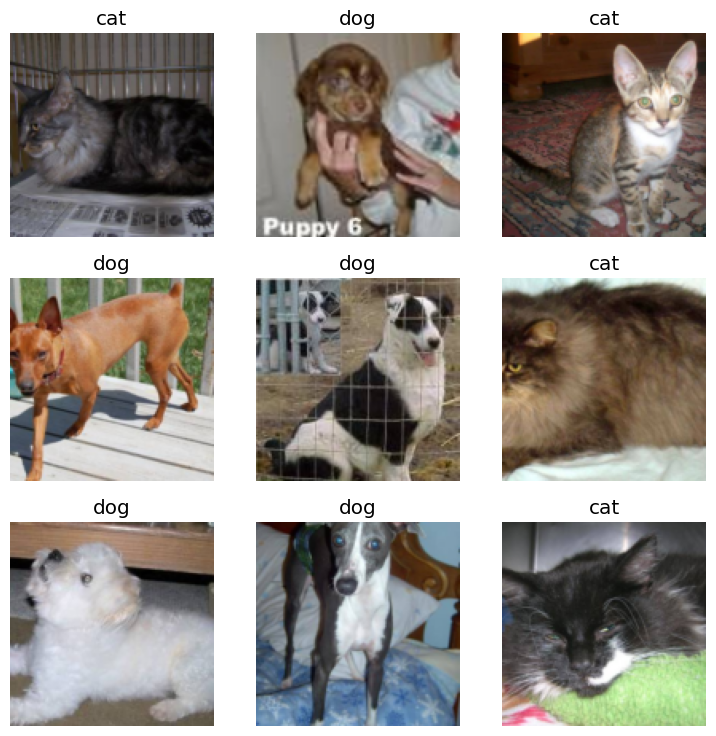

In [ ]:
task_a_dls.valid.show_batch()

Nauka nowego modelu na nowych danych, używając 5 epok.

In [ ]:
task_a_learner = vision_learner(task_a_dls, alexnet, metrics= accuracy)
task_a_learner.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.692134,0.397142,0.854839,00:02
1,0.573983,0.398067,0.854839,00:01
2,0.441832,0.425391,0.822581,00:02
3,0.414116,0.557299,0.822581,00:01
4,0.373423,0.474553,0.822581,00:02


In [ ]:
task_a_learner.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.287359,0.395973,0.870968,00:01
1,0.242237,0.400290,0.887097,00:01
2,0.227969,0.403427,0.854839,00:02
3,0.202198,0.379455,0.887097,00:02
4,0.204764,0.438760,0.870968,00:01


Porównuję skuteczność modelu oryginalnego i nowego modelu:

In [ ]:
original_model_results = learn.validate()
task_a_model_results = task_a_learner.validate()
print(f"Original Model - Accuracy: {original_model_results[1]:.4f}")
print(f"Task a Model - Accuracy: {task_a_model_results[1]:.4f}")

NameError: name 'task_a_learner' is not defined

Confusion matrix dla modelu z podpunktu a:

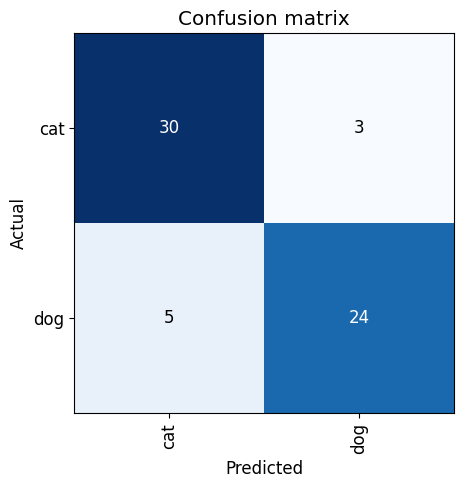

In [ ]:
ClassificationInterpretation.from_learner(task_a_learner).plot_confusion_matrix()

b. wytrenuj nowy model wprowadzając zmiany w zakresie: zmiany rozdzielczości danych do 300 px., zmiany techniki wypełniania „brakujących pikseli” (tj. padding) na „zeros”; zmniejszeniu wartości batch size o 5; zmniejszeniu ilości danych walidacyjnych do 15%, zmiany liczby epok do 5, porównaj wyniki z modelem oryginalnym.

Wczytuję dane ustawiając: rozmiar obrazka na 300 pikseli, padding na 0, batch size na 15 (o 5 mniejszy), dane walidacyjne na 15% oryginalnych:

In [ ]:
# Rozszerzamy augmentacje o padding.
augmentation_task_b = custom_transforms + [CropPad(300,"zeros")] # Padding na "zeros", croppujemy do rozmiaru obrazka czyli 300 pikseli.

task_b_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15, seed=32), # dane walidacyjne na 15%
    get_y=parent_label,
    item_tfms=Resize(300), # Rozmiar obrazkow na 300 pikseli
    batch_tfms=augmentation_task_b
)
task_b_dls= task_b_data.dataloaders(path, bs=15, num_workers= 0) # batch size zmniejszone do 5

c:\Python39\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


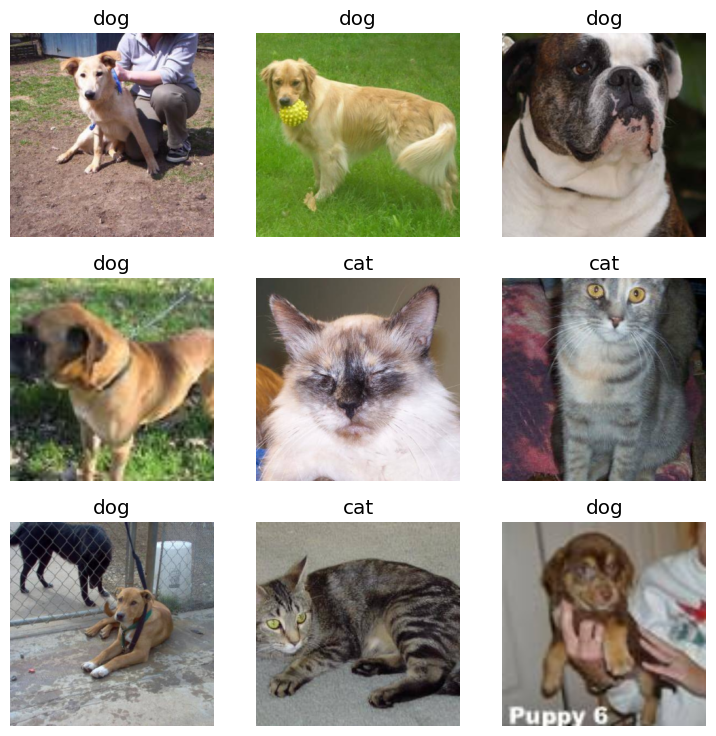

In [ ]:
task_b_dls.valid.show_batch()

Nauka nowego modelu na nowych danych, używając 5 epok.

In [ ]:
task_b_learner = vision_learner(task_b_dls, alexnet, metrics= accuracy)
task_b_learner.fit(n_epoch=5)

epoch,train_loss,valid_loss,accuracy,time
0,0.612667,0.137894,0.934783,00:05
1,0.411867,0.120913,0.934783,00:05
2,0.356386,0.104193,0.956522,00:05
3,0.288213,0.119552,0.956522,00:05
4,0.247593,0.140247,0.956522,00:05


In [ ]:
task_b_learner.fit(n_epoch=5)

epoch,train_loss,valid_loss,accuracy,time
0,0.154475,0.163098,0.956522,00:05
1,0.154995,0.153616,0.956522,00:05
2,0.170456,0.150532,0.956522,00:05
3,0.140731,0.174166,0.913043,00:05
4,0.124704,0.205791,0.913043,00:05


Porównuję skuteczność modelu oryginalnego i nowego modelu:

In [ ]:
original_model_results = learn.validate()
task_b_model_results = task_b_learner.validate()
print(f"Original Model - Accuracy: {original_model_results[1]:.4f}")
print(f"Task b Model - Accuracy: {task_b_model_results[1]:.4f}")

Original Model - Accuracy: 0.8065
Task b Model - Accuracy: 0.9130


Confusion matrix dla modelu z podpunktu b:

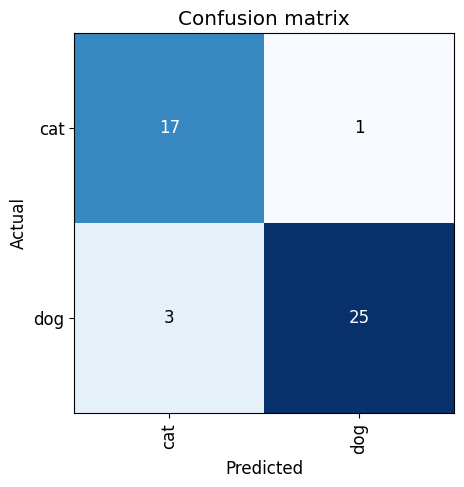

In [ ]:

ClassificationInterpretation.from_learner(task_b_learner).plot_confusion_matrix()

a. Ostatni model, tzn. ten z podpunktu b, cechuje się akceptowalną odkładnością klasyfikacji na poziomie 93%.
b. Pierwszy model ma większą podatność na błąd I. i II, rodzaju, drugi na I. rodzaju, a trzeci wydaje się najbardziej odporny na oba.
c. Proces uczenia modeli z podpunktów a i b przebiegał sprawnie, validation loss spadało równomiernie przez wszystkie (5) epok. Dla odmiany proces uczenia oryginalnego modelu po trzeciej epoce wykazywał stabilizację wartości wavlidation loss. Co więcej, nie obserwuję overfittingu w żadnym z modeli (tzn. nie widzę przypadku kiedy validation loss rośnie i accuracy maleje).


#### Opisz trzy wytrenowane przez siebie modele, udziel odpowiedzi na poniższe pytania:
##### a. Czy modele cechują się, Twoim zdaniem, dostateczną dokładnością klasyfikacji?##
Pierwszy model ma dokładność najniższą ok. 80% tzn., że  model czasem popełnia błędy. Drugi model z zadania "a" ma większą dokładność ok. 87%, może być uznany już jako dostatecznie dobry. Ostatni model, z zadania "b", cechuje się anajwyższą odkładnością klasyfikacji na poziomie 91%. To jest już bardzo wysoki poziom dokładności który sugeruje, że model jest dość pewny w klasyfikowaniu obrazów kotów i psów.
##### b. Czy jeden z modeli jest bardziej podatny na popełnienie błędu I/II rodzaju?
W modelu pierwszym mamy 5 przypadków psa błędnie zaklasyfikowanego jako kot oraz 7 przypadków kota błędnie zaklasyfikowanego jako psa.

W modelu z zadania "a" mamy 5 przypadków psa błędnie zaklasyfikowanego jako kot oraz 3 przypadków kota błędnie zaklasyfikowanego jako psa.

W modelu z zadania "b" m mamy 3 przypadki psa błędnie zaklasyfikowanego jako kot oraz tylko 1 przypadek kota błędnie zaklasyfikowanego jako psa.

Model pierwszy ma więcej błędów typu I.

Model z zadania "a" ma więcej błędów typu II.

Model z zadania "b" wydaje się mieć stosunkowo mało błędów obu rodzajów, ale może być bardziej podatny na błędy typu II.

Najbardziej podatny na błąd typu I i II jest model pierwszy.

##### c. Jak przebiegał proces uczenia się modeli? (po której epoce widoczna jest stabilizacja validation loss? czy obserwujesz objawy overfittingu – jeżeli tak, to w której epoce?)
Model pierwszy: Widzimy, że od epoki 2 do epoki 4 wartość validation loss maleje, a następnie od epoki 4 wartość validation loss pozostaje stosunkowo stabilna. Można przyjąć, że od epoki 4 validation loss zaczyna się stabilizować. Nie widać objawów overfittingu.

Model z zadania "a": Do epoki 5 wartość validation loss maleje, co sugeruje poprawę modelu.
Od epoki 5 do 9 wartość validation loss jest stosunkowo stabilna. Stabilizacja validation loss wydaje się występować od epoki 5.
Dokładność na danych walidacyjnych (accuracy) nadal rośnie, co jest pozytywnym sygnałem. Nie widać jednoznacznego overfittingu.

Model z zadania "b: Od epoki 2 validation loss wydaje się być na dość stałym poziomie. Przy 9 epoce widać, że dokładność spada a błąd walidacyjny rośnie, co może sugerować overfitting.